#Laboratory work 1
##Image Preprocessing with OpenCV
Variant 2

Student: Zhenissova Aruzhan
Group:10-11AM

##Task 1. Environment setup and image import

In [18]:
from google.colab import files
uploaded= files.upload()

uploaded.keys()

Saving bb00fbabd0a58d0bc918cb8bd5664837.jpg to bb00fbabd0a58d0bc918cb8bd5664837 (2).jpg


dict_keys(['bb00fbabd0a58d0bc918cb8bd5664837 (2).jpg'])

(np.float64(-0.5), np.float64(1199.5), np.float64(1199.5), np.float64(-0.5))

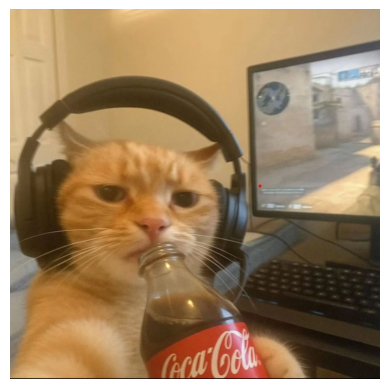

In [19]:
import cv2
import matplotlib.pyplot as plt

img=cv2.imread("bb00fbabd0a58d0bc918cb8bd5664837.jpg")
img_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")

In [20]:
print("Shape: ", img.shape)
print("Data type: ", img.dtype)

channels=img.shape[2] if len(img.shape)==3 else 1
print("Channels: ", channels)

Shape:  (1200, 1200, 3)
Data type:  uint8
Channels:  3


##Task 2: Color Space Processing

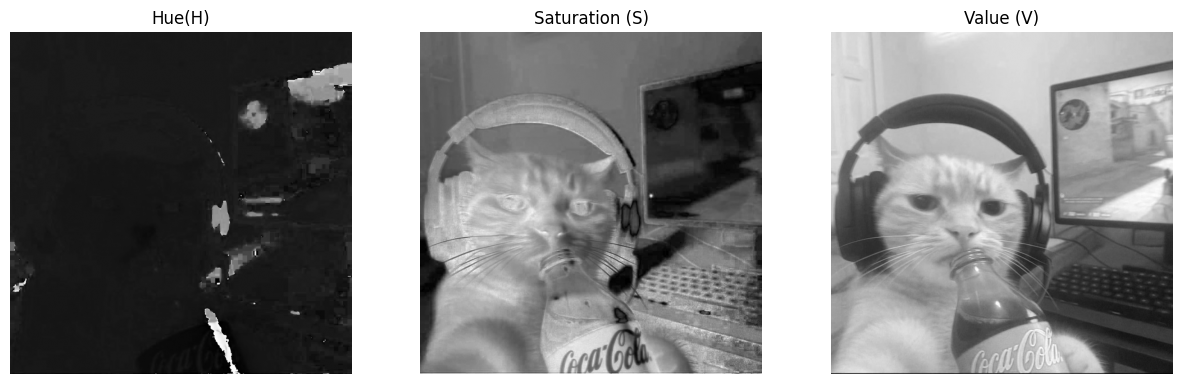

In [21]:
import cv2
img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v=cv2.split(img_hsv)

plt.figure(figsize=(15,5))

#Hue
plt.subplot(1,3,1)
plt.imshow(h, cmap="gray")
plt.title("Hue(H)")
plt.axis("off")

#Saturation
plt.subplot(1,3,2)
plt.imshow(s, cmap="gray")
plt.title("Saturation (S)")
plt.axis("off")

#Value
plt.subplot(1,3,3)
plt.imshow(v, cmap="gray")
plt.title("Value (V)")
plt.axis("off")

plt.show()

##Task 3. Image transformation

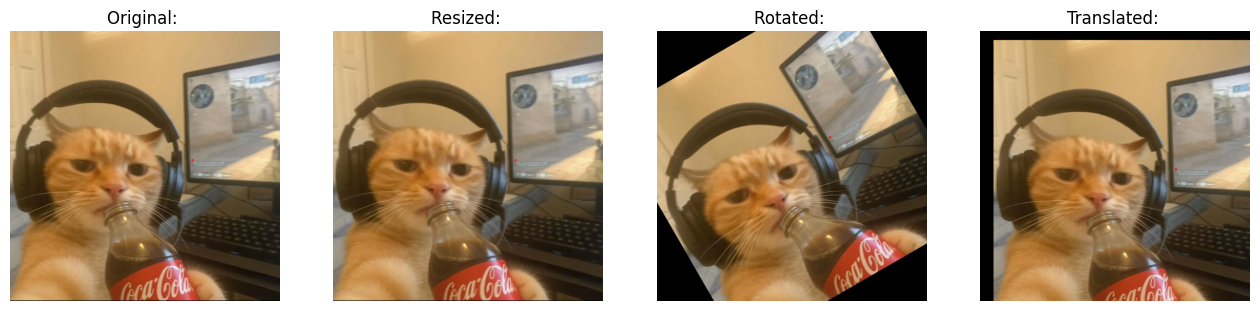

In [22]:
import numpy as np

#Resize
img_resized = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)

#Rotation
h,w = img.shape[:2]
center = (w/2,h/2)
M_rot = cv2.getRotationMatrix2D(center, 30, 1)
img_rotated = cv2.warpAffine(img, M_rot, (w,h))

#Translation
h,w=img.shape[:2]
center=(w/2,h/2)

M_trans=np.float32([[1,0,60],
                    [0,1,40]])
img_translated = cv2.warpAffine(img, M_trans, (w,h))

def show_bgr(title, bgr_img):
  rgb= cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
  plt.imshow(rgb)
  plt.title(title)
  plt.axis("off")

plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
show_bgr("Original: ", img)

plt.subplot(1,4,2)
show_bgr("Resized: ", img_resized)

plt.subplot(1,4,3)
show_bgr("Rotated: ", img_rotated)

plt.subplot(1,4,4)
show_bgr("Translated: ", img_translated)

plt.show()

##Task 4. Contrast enhancement and normalization

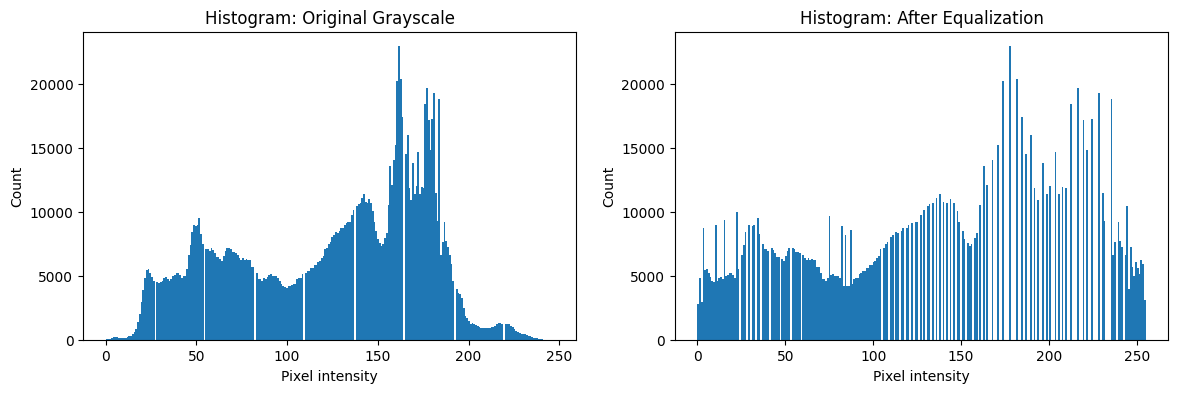

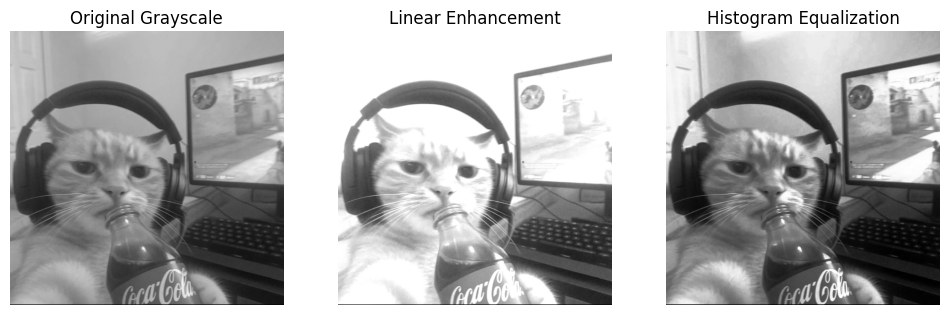

In [25]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
alpha=1.5
beta=30

enhanced_linear=cv2.convertScaleAbs(gray, alpha=alpha, beta=beta)
enhanced_eq =cv2.equalizeHist(gray)
gray_norm=gray.astype("float32") / 255.0
eg_norm = enhanced_eq.astype("float32") / 255.0

plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.hist(gray.ravel(), bins=256)
plt.title("Histogram: Original Grayscale")
plt.xlabel("Pixel intensity")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.hist(enhanced_eq.ravel(), bins=256)
plt.title("Histogram: After Equalization")
plt.xlabel("Pixel intensity")
plt.ylabel("Count")

plt.show()


plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(gray, cmap="gray")
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(enhanced_linear, cmap="gray")
plt.title("Linear Enhancement")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(enhanced_eq, cmap="gray")
plt.title("Histogram Equalization")
plt.axis("off")

plt.show()


##Task 5. Noise filtering and edge detection

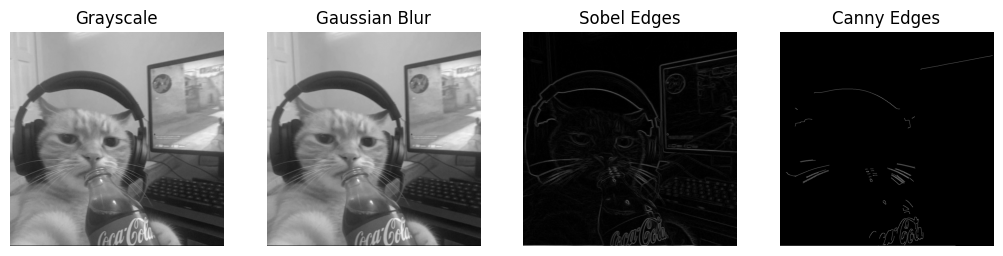

In [26]:
gray =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gaussian =cv2.GaussianBlur(gray, (5, 5), 0)
median =cv2.medianBlur(gray, 5)

sobel_x = cv2.Sobel(gaussian, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gaussian, cv2.CV_64F, 0, 1, ksize=3)

sobel= cv2.magnitude(sobel_x, sobel_y)

canny = cv2.Canny(gaussian, 100, 200)

plt.figure(figsize=(16,4))

plt.subplot(1,5,1)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1,5,2)
plt.imshow(gaussian, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(1,5,3)
plt.imshow(sobel, cmap="gray")
plt.title("Sobel Edges")
plt.axis("off")

plt.subplot(1,5,4)
plt.imshow(canny, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")

plt.show()



##Task 6. Binary image and object extraction

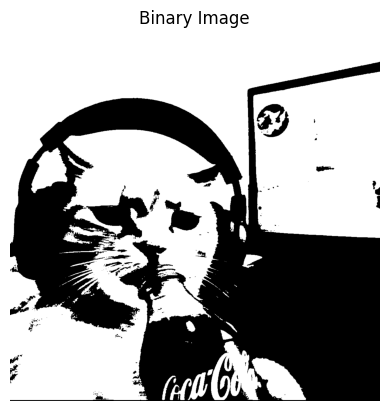

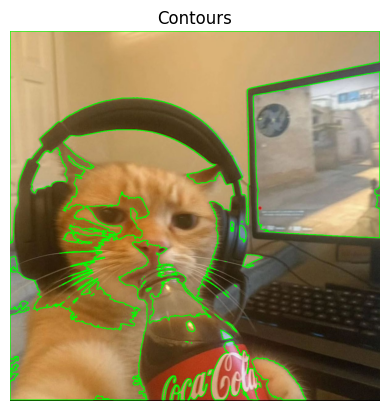

In [27]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap="gray")
plt.title("Binary Image")
plt.axis("off")
plt.show()

contours, hierarchy = cv2.findContours(
    binary,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

img_contours = img.copy()

cv2.drawContours(
    img_contours,
    contours,
    -1,
    (0, 255, 0),
    2
)

plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title("Contours")
plt.axis("off")
plt.show()


In [28]:
cv2.imwrite("enhanced.png", enhanced_eq)
cv2.imwrite("edges.png", canny)
cv2.imwrite("contours.png", img_contours)

True